In [333]:
import pickle
import os
import numpy as np
import pandas as pd

data_dir = 'data/'
subject = '1114936'
folders = os.listdir(data_dir+subject)
 
# reading top locations
with open('top_locations.dat') as f:
    location_top = pickle.load(f)
f.close()

# reading data
locs = []
times = []
lats = []
lngs = []
for fold in folders:
    if os.path.isfile(data_dir+subject+'/'+fold+'/eml.csv') and os.path.isfile(data_dir+subject+'/'+fold+'/fus.csv'):
        df = pd.read_csv(data_dir+subject+'/'+fold+'/eml.csv',sep='\t', header=None)
        locs.append(df.loc[0,6][2:-2])
        df = pd.read_csv(data_dir+subject+'/'+fold+'/fus.csv',sep='\t', header=None)
        times.append(np.array(df.loc[:,0])-6*3600)
        lats.append(np.array(df.loc[:,1]))
        lngs.append(np.array(df.loc[:,2]))
    else:
        print 'folder {} skipped'.format(fold)
        
times = [times[i] for i in range(len(locs)) if locs[i] in location_top]
lats = [lats[i] for i in range(len(locs)) if locs[i] in location_top]
lngs = [lngs[i] for i in range(len(locs)) if locs[i] in location_top]
locs = [locs[i] for i in range(len(locs)) if locs[i] in location_top]


folder 17 skipped
folder 13 skipped
folder 4 skipped
folder 5 skipped
folder 20 skipped
folder 111 skipped
folder 102 skipped
folder 63 skipped


In [305]:
import datetime
def timestamp_to_date(t_range):
    ts = []
    for (i,_) in enumerate(t_range):
        ts.append(datetime.datetime.fromtimestamp(t_range[i]).strftime('%m/%d'))
    return ts

In [316]:
def remove_parentheses(ss):
    for (i,_) in enumerate(ss):
        s = ss[i].split('(')
        s = s[0]
        ss[i] = s
    return ss

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

location_uniq = np.unique(locs)
plt.figure(figsize=(14,3))
for (i,loc) in enumerate(locs):
    ind = np.where(location_uniq==loc)[0][0]
    plt.plot(times[i],ind*np.ones(len(times[i])),'|',color=(0.5,0.5,0.5),markersize=15)
plt.ylim([-1,len(location_uniq)])
t_range = np.arange(1446940800.0, 1446940800.0+22*86400, 86400)
plt.xlim([t_range[0], t_range[t_range.size-1]])
plt.xticks(t_range, timestamp_to_date(t_range), rotation=270, fontsize=10)
plt.yticks(np.arange(len(location_uniq)), remove_parentheses(location_uniq),fontsize=10)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Semantic Location',fontsize=14)
plt.grid()


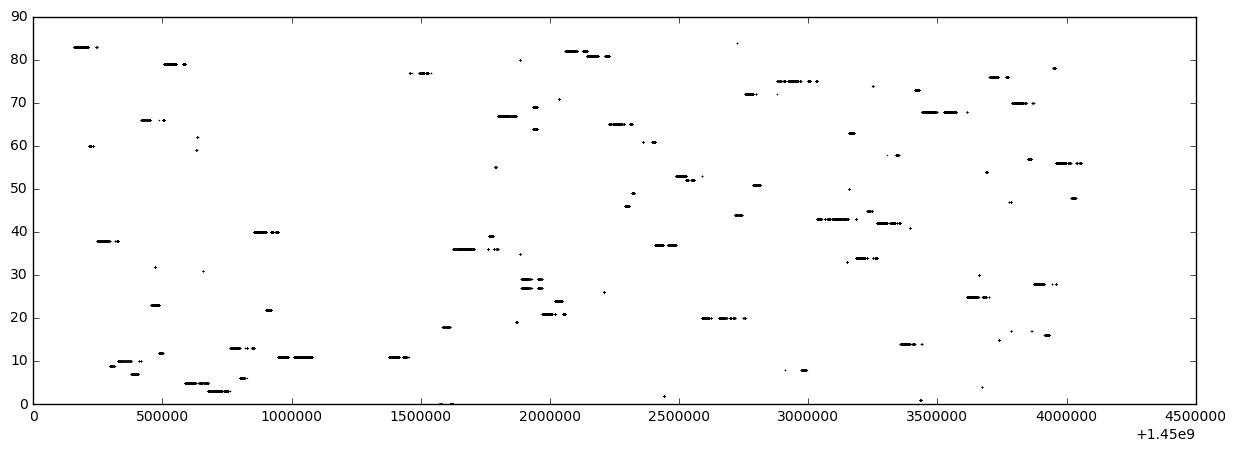

In [246]:
plt.figure(figsize=(15,5))
for (i,loc) in enumerate(locs):
#     plt.plot(times[i],lats[i],'.',color=(0,0,0),markersize=1)
    plt.plot(times[i],i*np.ones(len(times[i])),'.',color=(0,0,0),markersize=1)
# plt.ylim([0, 15])
# plt.xlim([1.446e9+2000000, 1.446e9+0+2200000])

(1448500000.0, 1449200000.0)

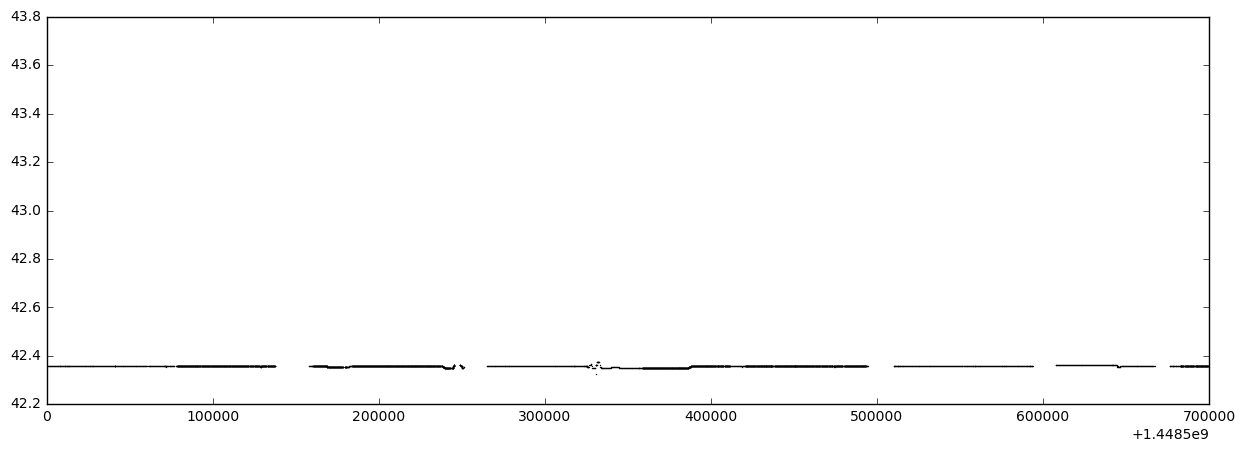

In [353]:
# original data

data_dir = '/home/sohrob/Dropbox/Data/CS120/'+subject+'/'
df = pd.read_csv(data_dir+'fus.csv',sep='\t', header=None)

plt.figure(figsize=(15,5))
plt.plot(df.loc[:,0], df.loc[:,1],'.',color=(0,0,0),markersize=1)
# plt.ylim([34.90, 34.95])
plt.xlim([1.446e9+2500000, 1.446e9+0+3200000])

(0, 300)

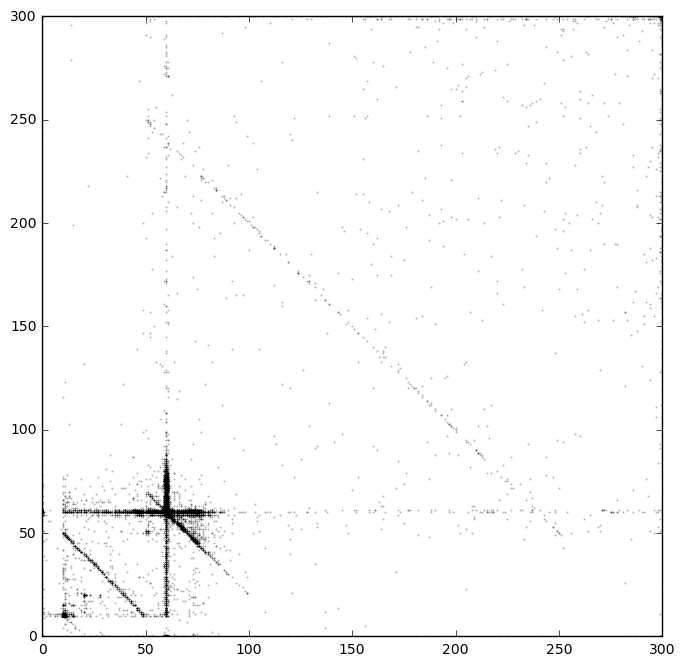

In [364]:
plt.figure(figsize=(8,8))
t = np.array(df.loc[:,0])
plt.plot(t[1:-1]-t[:-2],t[2:]-t[1:-1],'.',markersize=2,color=(0,0,0),alpha=.2)
plt.ylim([0,300])
plt.xlim([0,300])

(42.2, 42.6)

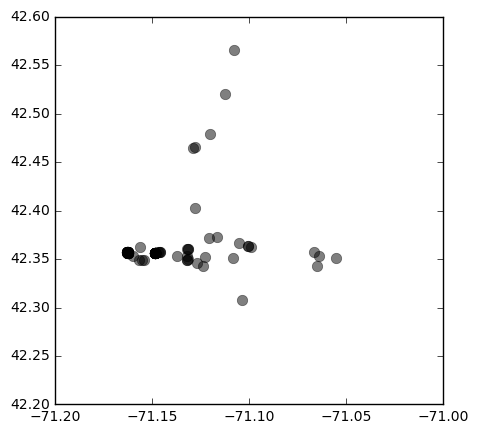

In [359]:
location_uniq = np.unique(locs)
colors = np.array([])
plt.figure(figsize=(5,5))
for (i,loc) in enumerate(locs):
    ind = np.where(location_uniq==loc)[0][0]
    plt.plot(np.mean(lngs[i]), np.mean(lats[i]), '.', color=(0,0,0), alpha=.5, markersize=15)
plt.xlim([-71.2,-71])
plt.ylim([42.2,42.6])

In [348]:
location_uniq.size

10